In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import everithing i need 

In [106]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


(0.0, 40.0)

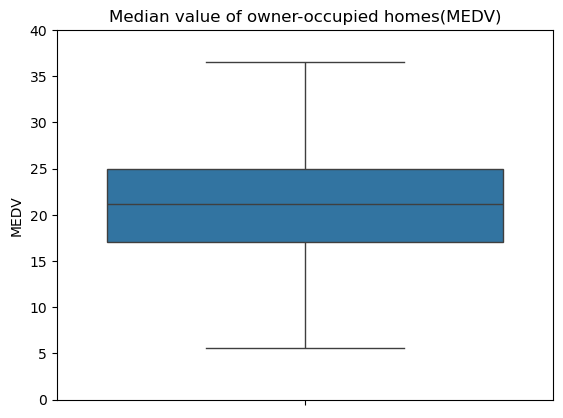

In [130]:
# "Median value of owner-occupied homes" boxplot
graph=sns.boxplot(y= 'MEDV', data=boston_df, showfliers=False)
pyplot.title('Median value of owner-occupied homes(MEDV)',)
pyplot.ylim(0,40)

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

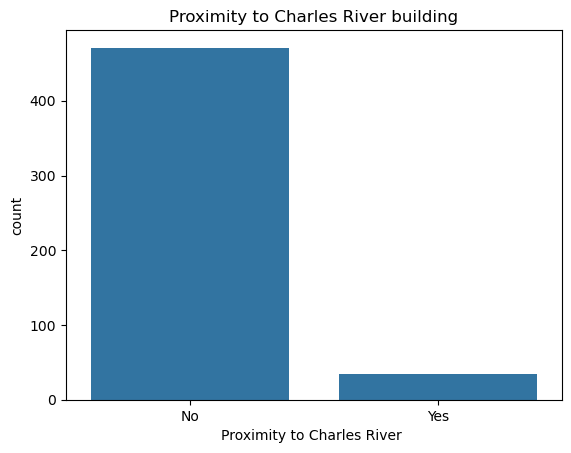

In [134]:
#bar plot for the Charles river variable
ax=sns.countplot( x='CHAS', data=boston_df)
pyplot.title('Proximity to Charles River building',)

ax.set_xlabel('Proximity to Charles River ')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

Text(0, 0.5, 'Median value of owner-occupied homes')

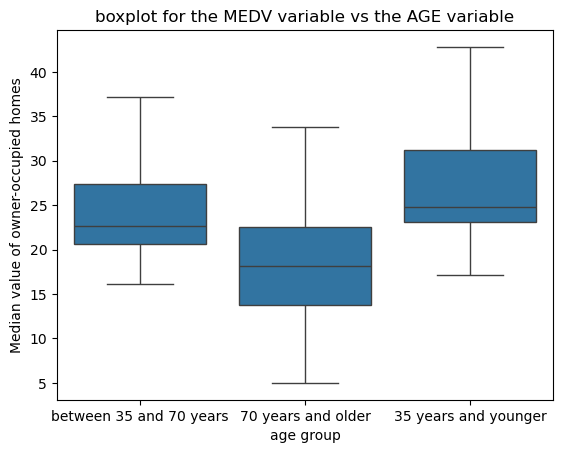

In [138]:
#discretize variable
boston_df['age group'] = None
boston_df.loc[(boston_df['AGE'] <= 35), 'age group'] = '35 years and younger'
boston_df.loc[((boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)), 'age group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age group'] = '70 years and older'
pyplot.title('boxplot for the MEDV variable vs the AGE variable')
graph=sns.boxplot(y= 'MEDV', x='age group', data=boston_df, showfliers=False)
graph.set_ylabel('Median value of owner-occupied homes')

Text(0.5, 1.0, 'relationship between Nitric oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS)')

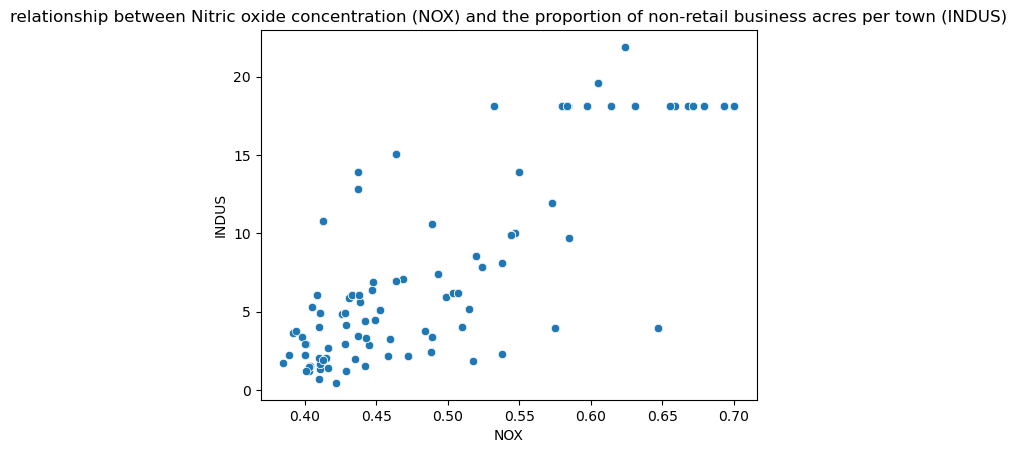

In [152]:
X_min, X_max = 0, 0.7
Y_min, Y_max = 0, 22
filtered_df = boston_df[(boston_df['NOX'] >= X_min) & (boston_df['NOX'] <= X_max) &(boston_df['INDUS'] >= Y_min) & (boston_df['INDUS'] <= Y_max)]
sns.scatterplot(x='NOX', y='INDUS', data=filtered_df)
pyplot.title('relationship between Nitric oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS)')

#### The graphically displayed shows a positive correlation between the two variables, confirmed by the Pearson test.

In [155]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Text(0.5, 1.0, 'histogram for the pupil to teacher ratio')

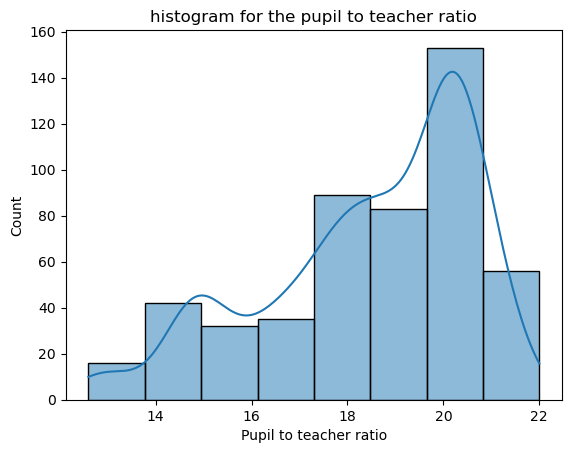

In [146]:
# Create a histogram for the pupil to teacher ratio variable
hist= sns.histplot(boston_df['PTRATIO'], bins=8, kde=True)
hist.set_xlabel('Pupil to teacher ratio')
pyplot.title('histogram for the pupil to teacher ratio')



# **Statistic**

# 1

* $H_0: β1$ = 0 (the boundary by the Charles River has no effect on the median value of owner-occupied homes)
* $H_1: β1$ is not equal to 0 (the boundary by the Charles River has an effect on the median value of owner-occupied homes)

In [164]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


+ since the p-value (7.390623170519905e-05) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that the boundary by the Charles River has an effect on the median value of owner-occupied homes

# 2 
* $H_0: β1$ = 0 (there is no difference in the Median values of houses for each proportion of owner occupied units built)
* $H_1: β1$ is not equal to 0 (there is a difference in the Median values of houses for each proportion of owner occupied units built)


In [167]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

y35 = boston_df[boston_df['age group'] == '35 years and younger']['MEDV']
mid = boston_df[boston_df['age group'] == 'between 35 and 70 years']['MEDV']
o35 = boston_df[boston_df['age group'] == '70 years and older']['MEDV']
scipy.stats.f_oneway(y35, mid, o35)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

+ since the p-value (1.7105011022702984e-15) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a difference in the Median values of houses for each proportion of owner occupied units built

# 3
*   $H\_0:$ (Nitric oxide concentration is not correlated with proportion of non-retail business acres per town)
*   $H\_1:$ (Nitric oxide concentration is correlated with proportion of non-retail business acres per town)

In [176]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

+  Since the p-value (7.913361061241167e-98) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentration and proportion of non-retail business acres per town.

# 4
*   $H\_0:$ (weighted distances to five Boston employment centres is not correlated with median value of owner occupied homes)
*   $H\_1:$ (weighted distances to five Boston employment centres is correlated with  median value of owner occupied homes)

In [182]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):                   1.52e-146
Time:                        13:35:06   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that weighted distances to five Boston employment centres is correlated with median value of owner occupied homes

**For each unit increase in the DIS variable the dependent variable MEDV median value of homes increases by 4.7985 units.**